In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import nibabel as nib
import statsmodels.api as sm
import statsmodels.formula.api as smf
from nibabel.processing import resample_from_to
import scipy 

In [2]:
# load the version where scores accounted for age , years of education, and lesion size
df = pd.read_csv('Neuropsych_adj.csv')

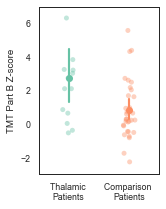

In [39]:
plt.figure(figsize=[2.4,3])
sns.set_context('paper', font_scale=1)
sns.set_style('white')
sns.set_palette("Set2")

fig1=sns.pointplot(x="Site", y="TMTB_z", join=False, hue='Site', dodge=False,
              data=df)
fig1=sns.stripplot(x="Site", y="TMTB_z",
              data=df, alpha = .4)

fig1.set_xticklabels(['Thalamic \nPatients', 'Comparison \nPatients'])
fig1.set_ylim([-3, 7])
#fig1.set_aspect(.15)
fig1.legend_.remove()
plt.xlabel('')
plt.ylabel('TMT Part B Z-score')
plt.tight_layout()
#plt.savefig('/home/kahwang/RDSS/tmp/figTMTB2.pdf')

In [54]:
adf = df[(df['Group']=='Medial Thalamus') | (df['Site']=='ctx')] 

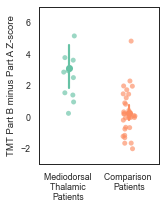

In [65]:
plt.figure(figsize=[2.4,3])
sns.set_context('paper', font_scale=1)
sns.set_style('white')
sns.set_palette("Set2")

fig1=sns.pointplot(x="Site", y="TMTB-A_z", join=False, hue='Site', dodge=False,
              data=adf)
fig1=sns.stripplot(x="Site", y="TMTB-A_z",
              data=adf, alpha = .65)

fig1.set_xticklabels(['Mediodorsal \nThalamic \nPatients', 'Comparison \nPatients'])
fig1.set_ylim([-3, 7])
#fig1.set_aspect(.15)
fig1.legend_.remove()
plt.xlabel('')
plt.ylabel('TMT Part B minus Part A Z-score')
plt.tight_layout()
plt.savefig('/home/kahwang/RDSS/tmp/figTMTB-A.pdf')

In [5]:
sdf = df[df['Site']=='Th']

In [58]:
sdf['Group']

0     Lateral Thalamus
1     Lateral Thalamus
2      Medial Thalamus
3      Medial Thalamus
4      Medial Thalamus
5      Medial Thalamus
6      Medial Thalamus
7      Medial Thalamus
8      Medial Thalamus
9      Medial Thalamus
10     Medial Thalamus
11    Lateral Thalamus
12     Medial Thalamus
13     Medial Thalamus
14     Medial Thalamus
Name: Group, dtype: object

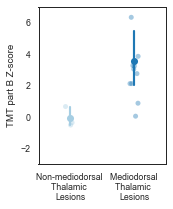

In [62]:
plt.figure(figsize=[2.5,3])
sns.set_context('paper', font_scale=1)
sns.set_style('white')
sns.set_palette("Paired")

fig1=sns.pointplot(x="Group", y="TMTB_z", join=False, hue='Group', dodge=False,
              data=sdf)
fig1=sns.stripplot(x="Group", y="TMTB_z",
              data=sdf, alpha = .4)

fig1.set_xticklabels(['Non-mediodorsal \nThalamic \nLesions', 'Mediodorsal \nThalamic \nLesions'])
fig1.set_ylim([-3, 7])
fig1.legend_.remove()
plt.xlabel('')
plt.ylabel('TMT part B Z-score')
plt.tight_layout()
plt.savefig('/home/kahwang/RDSS/tmp/figthB.pdf')

In [ ]:
plt.figure(figsize=[2.5,3])
sns.set_context('paper', font_scale=1)
sns.set_style('white')
sns.set_palette("Paired")

fig1=sns.pointplot(x="Group", y="TMTB-A_z", join=False, hue='Group', dodge=False,
              data=sdf)
fig1=sns.stripplot(x="Group", y="TMTB-A_z",
              data=sdf, alpha = .4)

fig1.set_xticklabels(['Non-mediodorsal \nThalamic \nLesions', 'Mediodorsal \nThalamic \nLesions'])
fig1.set_ylim([-3, 7])
fig1.legend_.remove()
plt.xlabel('')
plt.ylabel('TMT part B Z-score')
plt.tight_layout()
plt.savefig('/home/kahwang/RDSS/tmp/figthB-A.pdf')

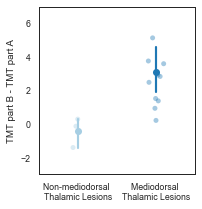

In [7]:
plt.figure(figsize=[2.9,3])
sns.set_context('paper', font_scale=1)
sns.set_style('white')
sns.set_palette("Paired")

fig1=sns.pointplot(x="Group", y="TMTB-A_z", join=False, hue='Group', dodge=False,
              data=sdf)
fig1=sns.stripplot(x="Group", y="TMTB-A_z",
              data=sdf, alpha = .4)

fig1.set_xticklabels(['Non-mediodorsal \nThalamic Lesions', 'Mediodorsal \nThalamic Lesions'])
fig1.set_ylim([-3, 7])
fig1.legend_.remove()
plt.xlabel('')
plt.ylabel('TMT part B - TMT part A')
plt.tight_layout()
plt.savefig('/home/kahwang/RDSS/tmp/fig3C.pdf')

In [676]:
## Calcualte average FC for each lesion mask
patients = [1105, 1692, 1809, 1830, 2092, 2105, 2552, 2781, 3049, 3184, 'CA018', 
            'CA041', 'CA104', 'CA105']
yeonetwork = nib.load('/data/backed_up/shared/ROIs/Yeo7network_2mm.nii.gz').get_data()
networks = ['V', 'SM', 'DA', 'CO', 'Lim', 'FP', 'DF']

for p in patients:
	fcfile = '/home/kahwang/bsh/Tha_Lesion_Mapping/NKI_groupFC_%s.nii.gz'  %p
	fcmap = nib.load(fcfile).get_data()[:,:,:,0,0]

	for i, n in enumerate(networks):
		df.loc[df['Sub']==str(p), n] =  np.mean(fcmap[yeonetwork==i+1])


In [677]:
sdf = df[df['Site']=='Th']

In [731]:
sdf.loc[sdf['TMTB_adj']<2, 'Impaired'] = 'Less impaired'
sdf.loc[sdf['TMTB_adj']>=2, 'Impaired'] = 'Impaired'
sdf['Impaired']


0     Less impaired
1     Less impaired
2          Impaired
3          Impaired
4          Impaired
5          Impaired
6          Impaired
7          Impaired
8          Impaired
9               NaN
10    Less impaired
11    Less impaired
12    Less impaired
13         Impaired
14         Impaired
Name: Impaired, dtype: object

In [732]:
sdf

,Unnamed: 0,Sub,Age,Sex,Site,PE,TMTA,TMTB,TMTB-TMTA,Boston,...,VP,V_parcel,SM_parcel,DA_parcel,CO_parcel,Lim_parcel,FP_parcel,DF_parcel,PC,WMD
0,0,1692,58,M,Th,NaN,39.0,91.0,52.0,52.0,...,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,74.095238,143.119048
1,1,1809,62,F,Th,NaN,31.0,67.0,36.0,50.0,...,24.0,0.0,20.0,0.0,23.0,0.0,0.0,0.0,69.250000,7.409091
2,2,1830,68,M,Th,17.0,38.0,170.0,132.0,54.0,...,0.0,0.0,0.0,0.0,1.0,0.0,62.0,14.0,43.927632,263.493421
3,3,2105,69,M,Th,NaN,50.0,174.0,124.0,54.0,...,0.0,0.0,0.0,0.0,42.0,5.0,95.0,36.0,69.000000,164.872928
4,4,3049,52,M,Th,NaN,28.0,110.0,82.0,56.0,...,0.0,0.0,0.0,0.0,44.0,0.0,15.0,8.0,81.552239,192.970149
5,5,1105,57,M,Th,NaN,36.0,152.0,116.0,56.0,...,0.0,0.0,0.0,0.0,95.0,0.0,0.0,0.0,44.871212,122.628788
6,6,2781,60,M,Th,49.0,49.0,138.0,89.0,57.0,...,0.0,0.0,0.0,0.0,4.0,0.0,29.0,33.0,84.878788,297.106061
7,7,2552,52,F,Th,6.0,28.0,94.0,66.0,51.0,...,0.0,0.0,1.0,0.0,60.0,0.0,67.0,119.0,69.446429,236.832143
8,8,2092,52,M,Th,5.0,39.0,94.0,55.0,54.0,...,0.0,0.0,0.0,0.0,75.0,0.0,49.0,10.0,70.582090,171.500000
9,9,902,32,M,Th,19.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/data/backed_up/anaconda2/envs/pymer4/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TMTB_z   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     2.520
Date:                Fri, 13 Mar 2020   Prob (F-statistic):              0.138
Time:                        11:03:28   Log-Likelihood:                -34.002
No. Observations:                  14   AIC:                             72.00
Df Residuals:                      12   BIC:                             73.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      1.909      0.000      1.000      -4.159       4.160
FP            63.1682     39.790      1.588      0.138     -23.527     149.863
==============================================================================
Omnibus:                       15.741   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.031
Skew:                           1.738   Prob(JB):                      0.00244
Kurtosis:                       5.922   Cond. No.                         50.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

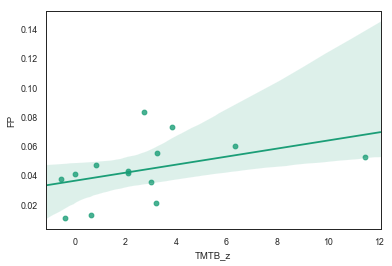

In [697]:
a=sns.regplot(x='TMTB_z', y='FP', data=sdf) #
smf.ols(formula='TMTB_z~FP', data=sdf).fit().summary()

In [682]:
#2mm lesion mask /data/backed_up/kahwang/Tha_Neuropsych/Lesion_Masks/2mm/rsmask_CA001.nii.gz
#WMD and PC at /data/backed_up/kahwang/Tha_Neuropsych/FC_analysis
# ROI /data/backed_up/kahwang/Tha_Neuropsych/ROI

Morel = {
1: 'AN',
2: 'VM',
3: 'VL',
4: 'MGN',
5: 'MD',
6: 'PuA',
7: 'LP',
8: 'IL',
9: 'VA',
10: 'Po',
11: 'LGN',
12: 'PuM',
13: 'PuI',
14: 'PuL',
17: 'VP'
}

yeonetwork = nib.load('/data/backed_up/kahwang/Tha_Neuropsych/ROI/1000subjects_TightThalamus_clusters007_ref.nii.gz').get_data()
networks = ['V', 'SM', 'DA', 'CO', 'Lim', 'FP', 'DF']


patients = [1105, 1692, 1809, 1830, 2092, 2105, 2552, 2781, 3049, 3184, 'CA018',
            'CA041', 'CA104', 'CA105']
morel_atlas = nib.load('/data/backed_up/kahwang/Tha_Neuropsych/ROI/Thalamus_Morel_consolidated_mask_v3.nii.gz').get_data()
PCmap = nib.load('/data/backed_up/kahwang/Tha_Neuropsych/FC_analysis/PC.nii.gz').get_data()
WMDmap= nib.load('/data/backed_up/kahwang/Tha_Neuropsych/FC_analysis/WMD.nii.gz').get_data()
lesion_count={}

for p in patients:
    maskfile = '/data/backed_up/kahwang/Tha_Neuropsych/Lesion_Masks/rsmask_%s.nii.gz'  %p
    lesion_mask = nib.load(maskfile).get_data()
    lesion_count[p] = {}
    total = np.sum(lesion_mask[morel_atlas!=0])
    for key in Morel.keys():
        lesion_count[p][Morel[key]] = np.sum(lesion_mask[morel_atlas==key])
        sdf.loc[sdf['Sub'] == str(p), Morel[key]] = np.sum(lesion_mask[morel_atlas==key]) #/ total #/ np.sum(morel_atlas[morel_atlas==key])
    
    total = np.sum(lesion_mask[yeonetwork!=0])
    for i, network in enumerate(networks):
        #lesion_count[p][Morel[key]] = np.sum(lesion_mask[morel_atlas==key])/ total
        sdf.loc[sdf['Sub'] == str(p),network+'_parcel'] = np.sum(lesion_mask[yeonetwork==i+1]) 
    
    sdf.loc[sdf['Sub'] == str(p),'PC'] = np.mean(PCmap[lesion_mask!=0])
    sdf.loc[sdf['Sub'] == str(p),'WMD'] = np.mean(WMDmap[lesion_mask!=0])

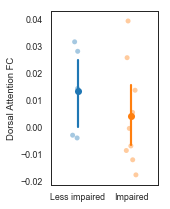

In [714]:
plt.figure(figsize=[2.45,3])
sns.set_context('paper', font_scale=1)
sns.set_style('white')
sns.set_palette("tab10")

fig1=sns.pointplot(x="Impaired", y="DA", join=False, hue='Impaired', dodge=False,
              data=sdf)
fig1=sns.stripplot(x="Impaired", y="DA",hue='Impaired',
              data=sdf, alpha = .4)

#fig1.set_aspect(.15)
fig1.legend_.remove()
plt.xlabel('')
plt.ylabel('Dorsal Attention FC')
plt.tight_layout()
plt.savefig('/home/kahwang/figDA.pdf')



In [709]:
scipy.stats.mannwhitneyu(sdf.loc[sdf['Impaired']=='Impaired']['FP'].values, sdf.loc[sdf['Impaired']=='Less impaired']['FP'].values)	

MannwhitneyuResult(statistic=8.0, pvalue=0.030974075706740573)

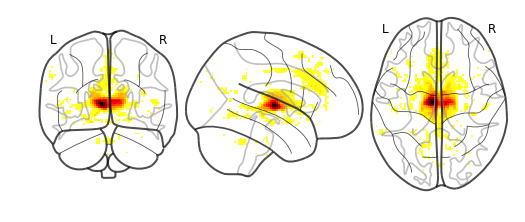

In [34]:
from nilearn import plotting
plotting.plot_glass_brain('corrmask_3049.nii', threshold=.1)

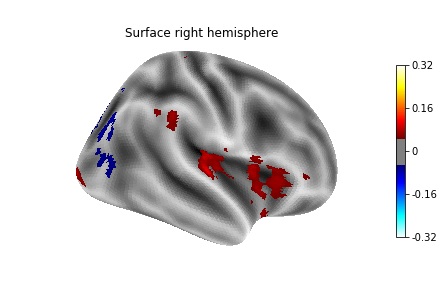

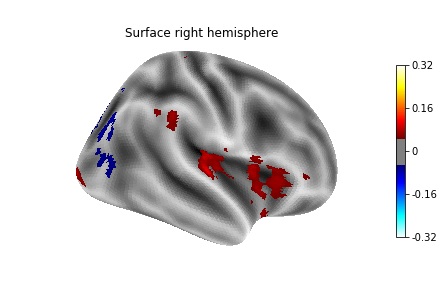

In [38]:
from nilearn import surface
fsaverage = ni.datasets.fetch_surf_fsaverage()
texture = surface.vol_to_surf('corrmask_3049.nii', fsaverage.pial_right)

plotting.plot_surf_stat_map(fsaverage.infl_right, texture, hemi='right',
                            title='Surface right hemisphere', colorbar=True,
                            threshold=.05, bg_map=fsaverage.sulc_right)